In [15]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns

In [3]:
dfh = pd.read_csv('/Users/sakhwathosan/Desktop/ML/ML new/Data/heart.csv')

In [8]:
dfh.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
dfh.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [11]:
X = d.drop('target', axis=1)
y = d['target']  

In [12]:
from sklearn.ensemble import ExtraTreesClassifier


test = ExtraTreesClassifier()
test.fit(X,y)
scores = pd.DataFrame(test.feature_importances_)
columns = pd.DataFrame(X.columns)

feat_importances = pd.concat([columns,scores],axis=1)
feat_importances.columns = ['Specs','Importance']
feat_importances

,Specs,Importance
0,age,0.076469
1,sex,0.057054
2,cp,0.134644
3,trestbps,0.059105
4,chol,0.062619
5,fbs,0.019792
6,restecg,0.034232
7,thalach,0.089583
8,exang,0.108721
9,oldpeak,0.083826


In [13]:
print(feat_importances.nlargest(10,'Importance'))

       Specs  Importance
2         cp    0.134644
11        ca    0.113997
8      exang    0.108721
12      thal    0.097147
7    thalach    0.089583
9    oldpeak    0.083826
0        age    0.076469
10     slope    0.062812
4       chol    0.062619
3   trestbps    0.059105


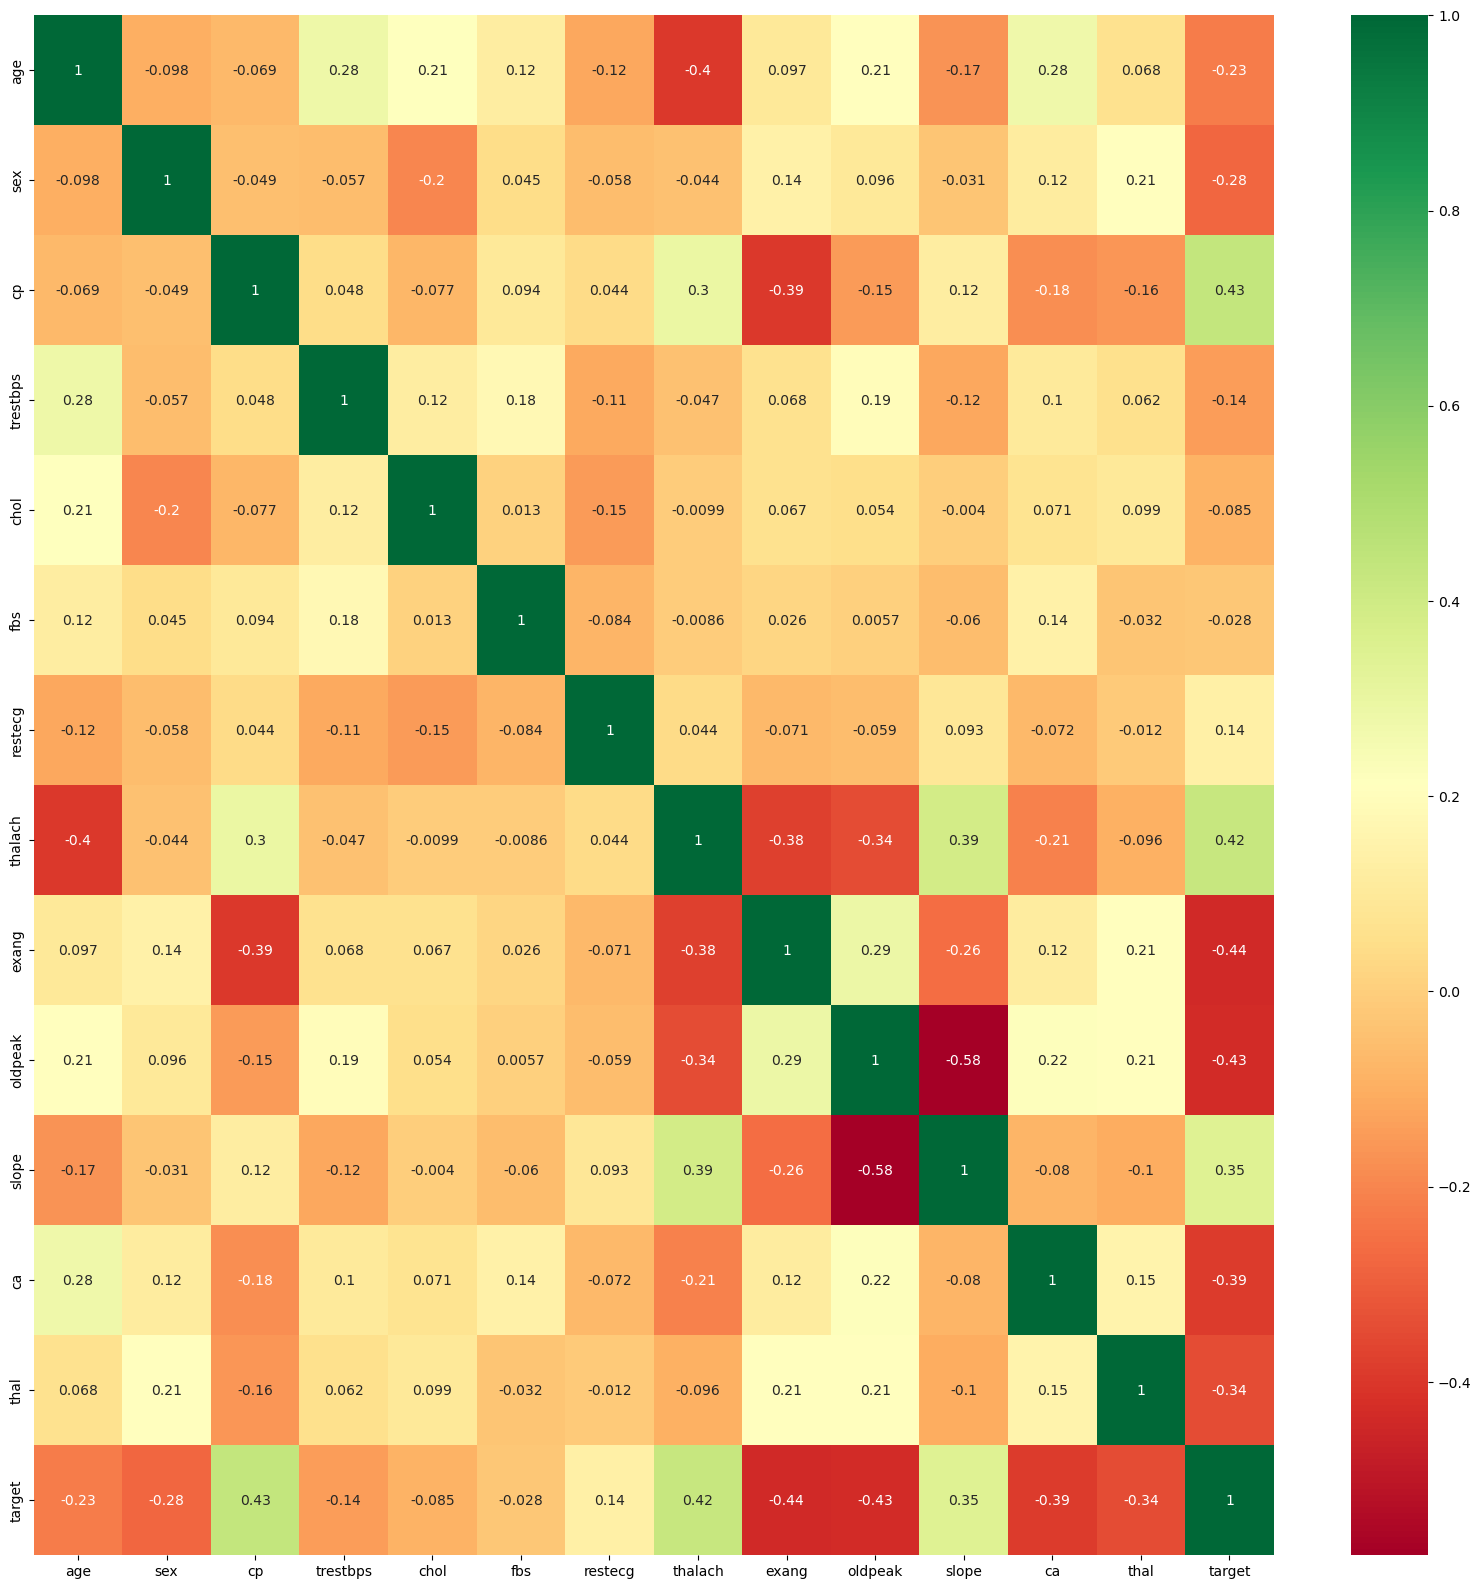

In [16]:
corrmat = d.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

g=sns.heatmap(d[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [17]:
X_scaled = StandardScaler().fit_transform(X)

In [18]:
X_scaled

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

In [52]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_pca = pd.DataFrame(X_pca, columns = ['PC1', 'PC2'])
X_pca

,PC1,PC2
0,0.624111,2.321270
1,-0.455988,-0.957351
2,-1.828805,0.042885
3,-1.716006,-0.495337
4,-0.371356,0.301156
...,...,...
298,1.146672,-0.519529
299,-0.708593,-1.045752
300,2.459005,0.478262
301,1.762755,-2.336816


In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_pca,y,test_size=0.1)

In [59]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test,y_pred))


0.8064516129032258


In [60]:
finalDf = pd.concat([X_pca, dfh[['target']]], axis = 1)

In [61]:
X = finalDf.iloc[:,:-1]
y = finalDf.iloc[:,-1]

In [62]:
X_train.shape

(272, 2)

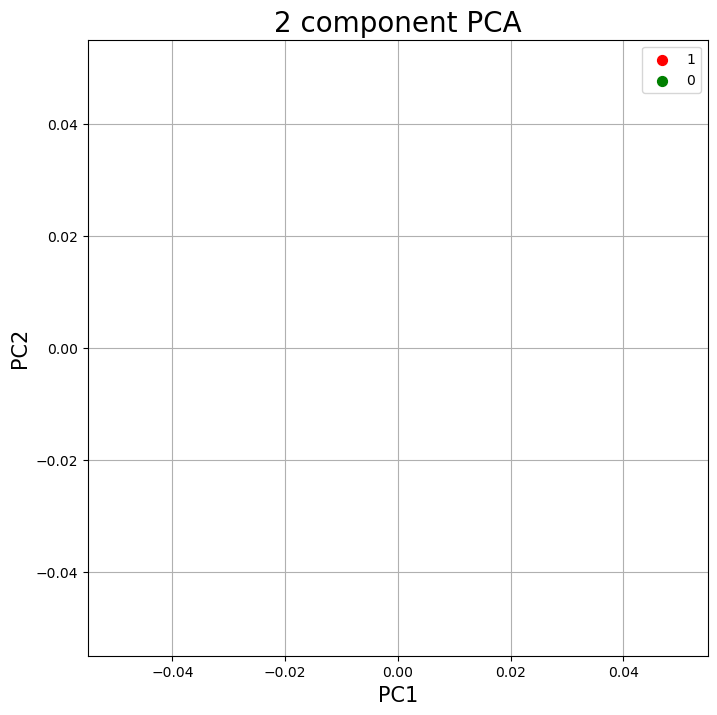

In [63]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['1', '0']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [64]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

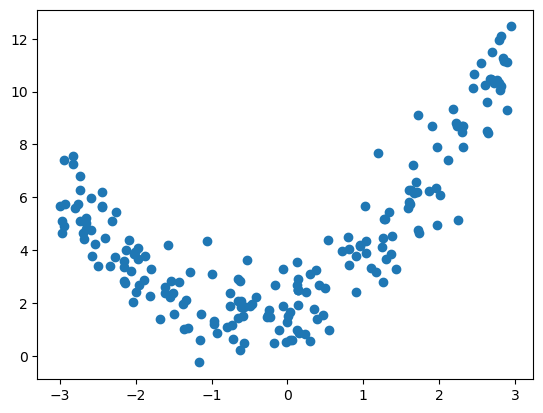

In [65]:
plt.scatter(X, y)
plt.show() 

In [70]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [72]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [73]:
reg = Ridge(alpha=0.1)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

In [74]:
print(reg.coef_)
print(reg.intercept_)

print("R2 score",r2_score(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

[[0.89629529]]
[4.59671109]
R2 score 0.19343877382358932
RMSE 2.4411116221764773


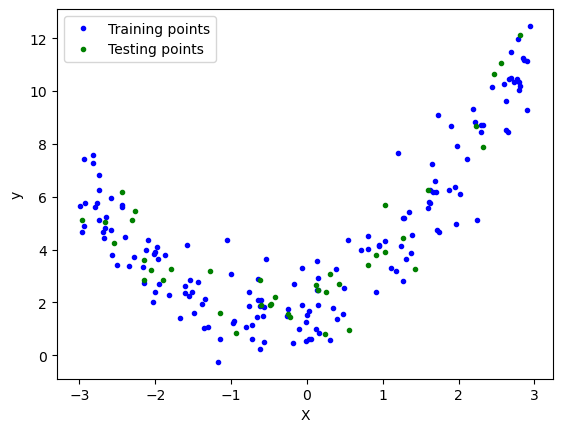

In [76]:
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()